# HOMEWORK 12

In this homework you are going to inspect the GTSDB (German Traffic Sign Detection Benchmark) dataset. The dataset contains images of various classes of traffic signs used in Germany (and the whole EU). The objective of this homework is to go through the steps described below and to implement the necessary code.

At the end, as usual, there will be a couple of questions for you to answer. In addition, the last section of this homework is optional and, if you chose to do it, you'll earn extra point :-)

In [34]:
import os
import cv2
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

### Step 0

Go to the GTSRB dataset official site ([link](https://benchmark.ini.rub.de/gtsrb_dataset.html)) to learn more about the dataset.

### Step 1

Download the dataset ([link](https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign)) and unzip it.

### Step 2

For this homework, you will be working with the training set. Check out the `Train.csv`, open it and see what it contains. Load the dataset and plot random samples.

Number of samples: 39209


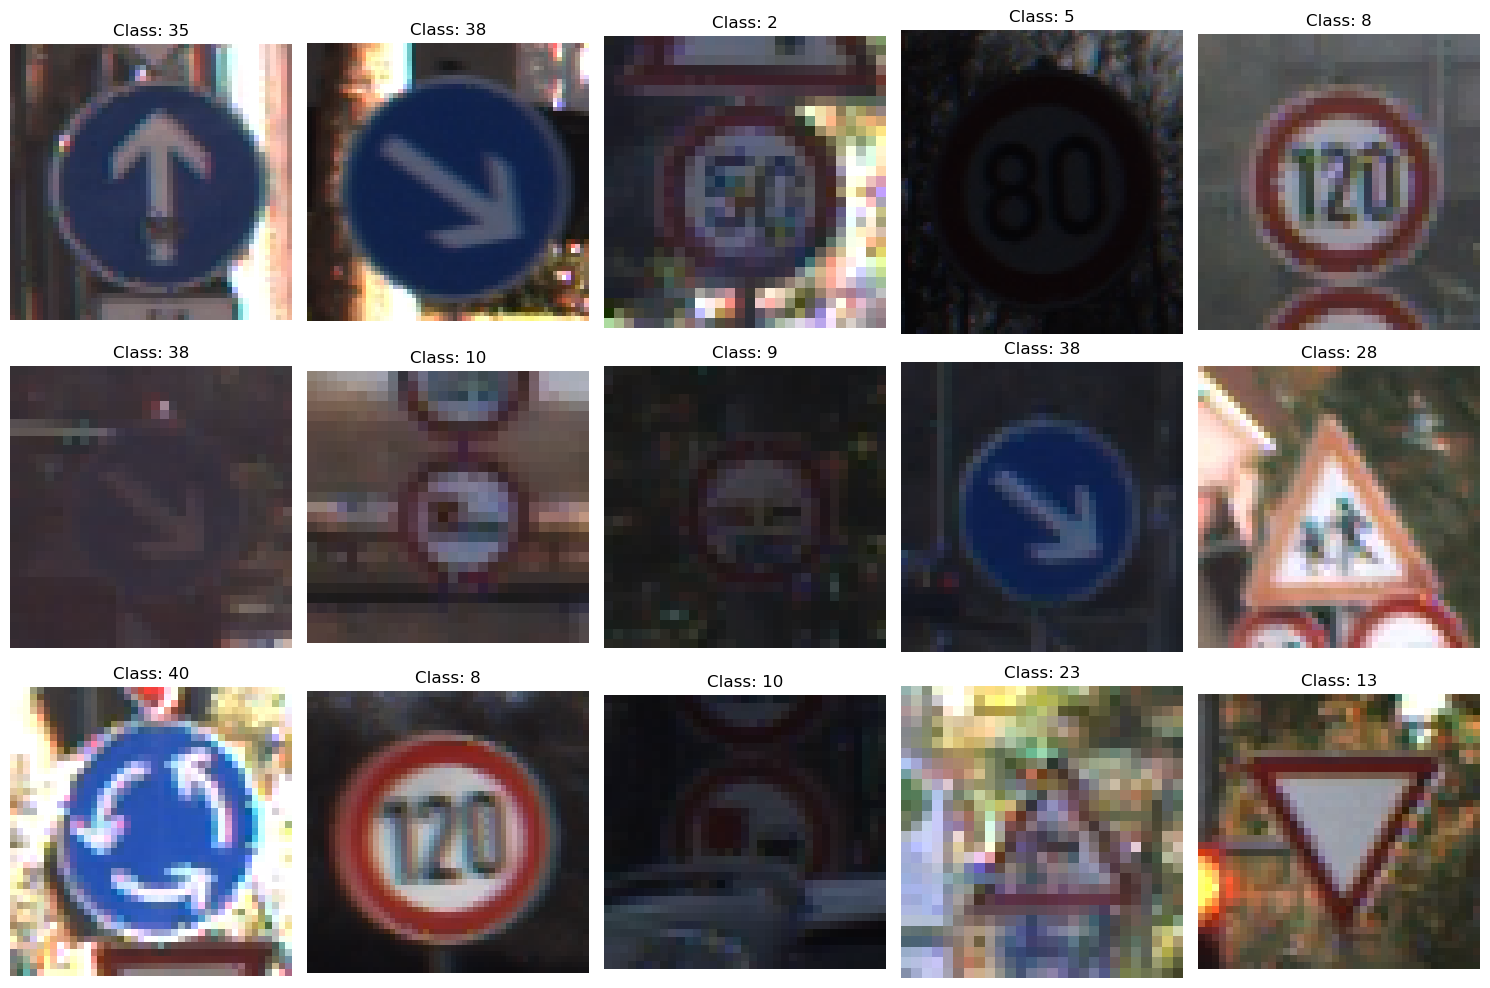

In [39]:
root = '/Users/Roman Zubrytskyi/Downloads/archive (2)'
data = pd.read_csv(os.path.join(root, 'Train.csv'))

num_samples = len(data)
print(f"Number of samples: {num_samples}")

for ii in range(15):
    idx = np.random.randint(0, num_samples)
    img = cv2.imread(os.path.join(root, data.iloc[idx]['Path']))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(3, 5, ii + 1)
    plt.imshow(img)
    plt.title(f"Class: {data.iloc[idx]['ClassId']}")
    plt.axis('off')
plt.tight_layout()
plt.show()

### Step 3

Inspect the dataset by computing and plotting the per-class histogram.

In [41]:
ids = data['ClassId']

Compute the per class histogram. You can use any approach you want (e.g. `numpy`). It's also worth looking at the `Counter` function from the `collections` module ([link](https://docs.python.org/3/library/collections.html#collections.Counter)) ;-)

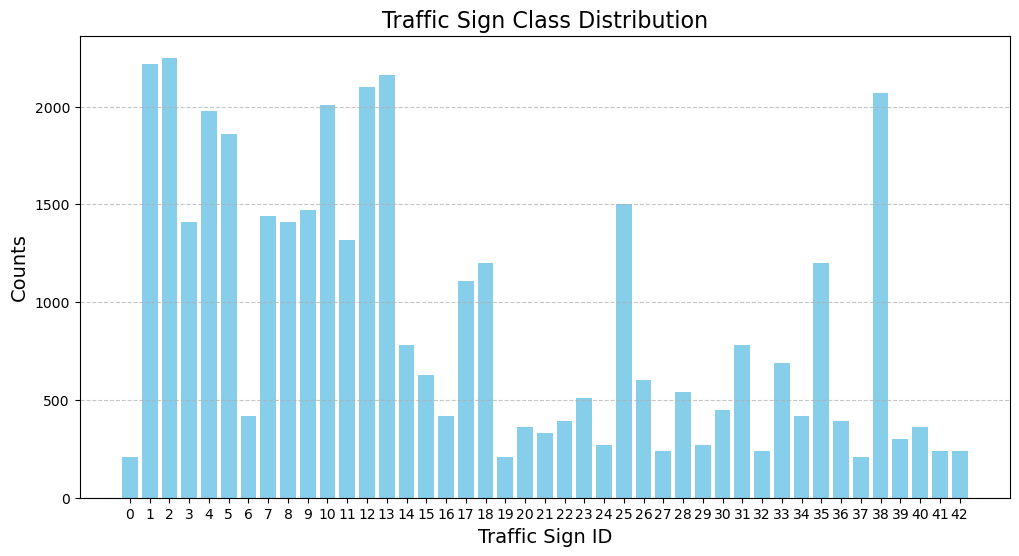

In [45]:
from collections import Counter
hist = Counter(ids)

plt.figure(figsize=(12, 6))
plt.bar(hist.keys(), hist.values(), color='skyblue')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Traffic Sign ID', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Traffic Sign Class Distribution', fontsize=16)
plt.xticks(list(hist.keys()))
plt.show()

### Questions

Please answer the following questions:
* Do you consider the dataset to be balanced? If so, why? If not, why?
* Are there any classes that are (significantly) over-represented or under-represeneted?

The dataset is not balanced. The number of samples varies approximately from 250 to 2250 per class. We have both significantly over-represented and under-represented classes.

### Optional

Perform a further analysis on the dataset and draw some conclusion from it.

Hint 1: Unlike MNIST or CIFAR10, this dataset contains images with various spatial resolutions. Is there anything we can tell about the resolution distribution?
Hint 2: What about the brightness distribution? Are there classes there are significantly more bright than others?

In [49]:
widths = []
heights = []
class_ids = []

for idx in range(num_samples):
    img_path = os.path.join(root, data.iloc[idx]['Path'])
    img = cv2.imread(img_path)
    h, w = img.shape[:2]
    widths.append(w)
    heights.append(h)
    class_ids.append(data.iloc[idx]['ClassId'])

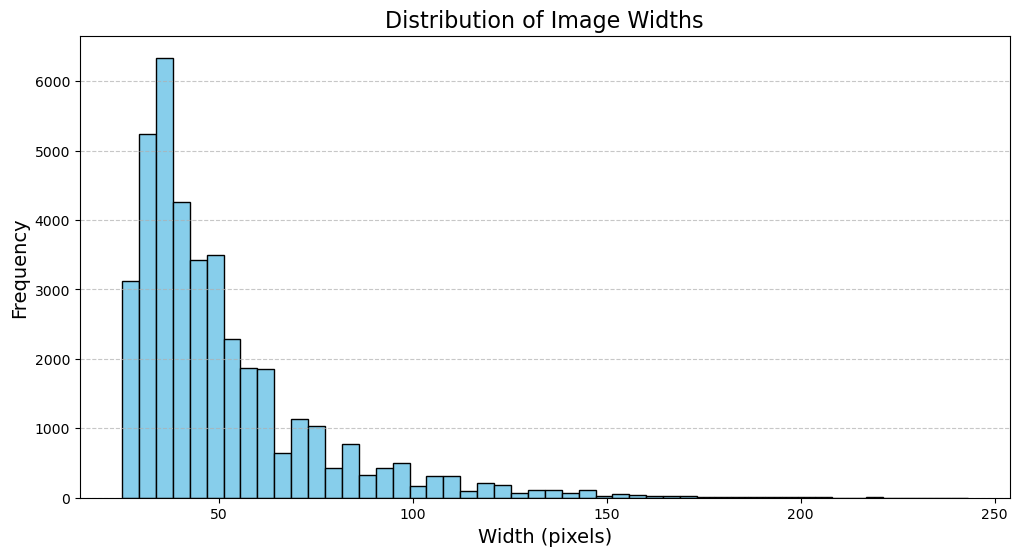

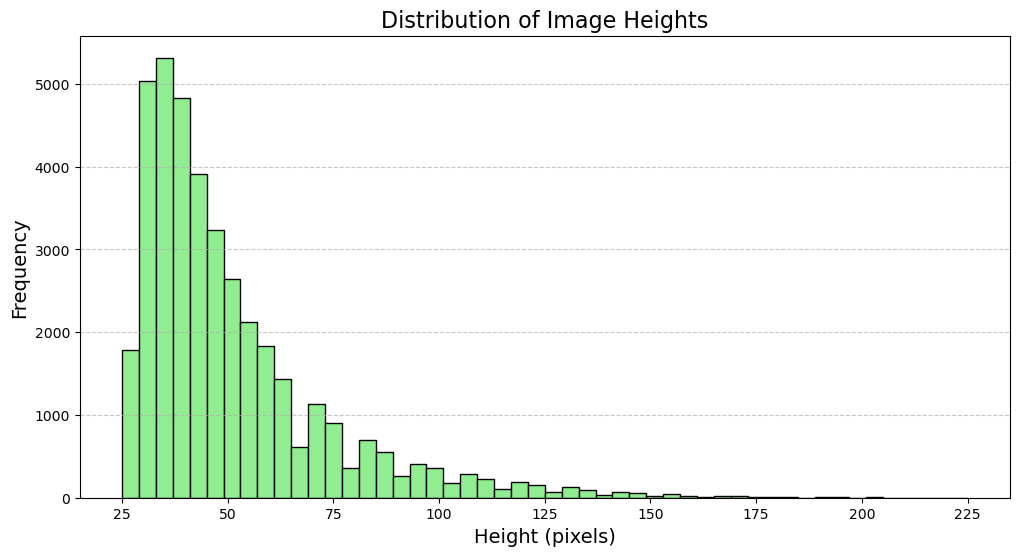

In [50]:
plt.figure(figsize=(12, 6))
plt.hist(widths, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Image Widths', fontsize=16)
plt.xlabel('Width (pixels)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(12, 6))
plt.hist(heights, bins=50, color='lightgreen', edgecolor='black')
plt.title('Distribution of Image Heights', fontsize=16)
plt.xlabel('Height (pixels)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

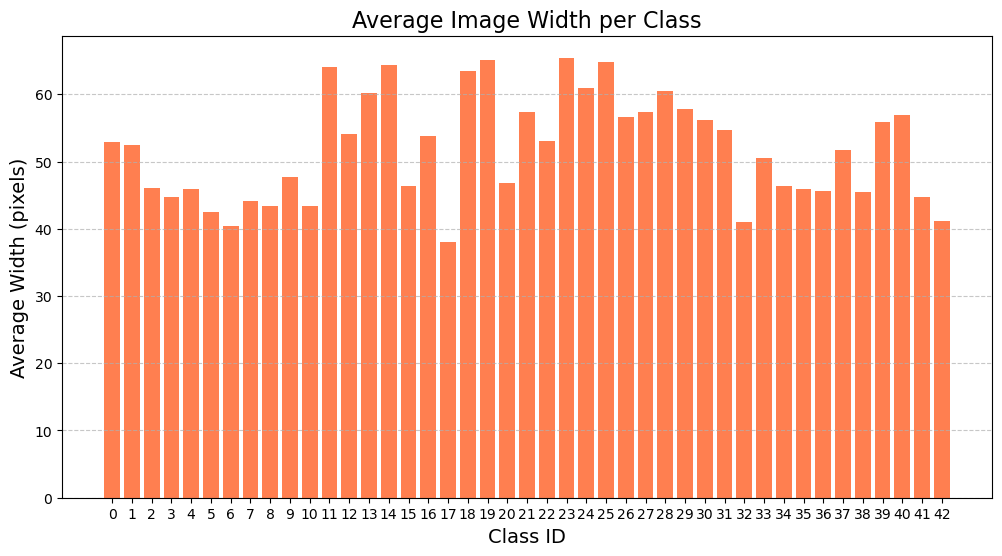

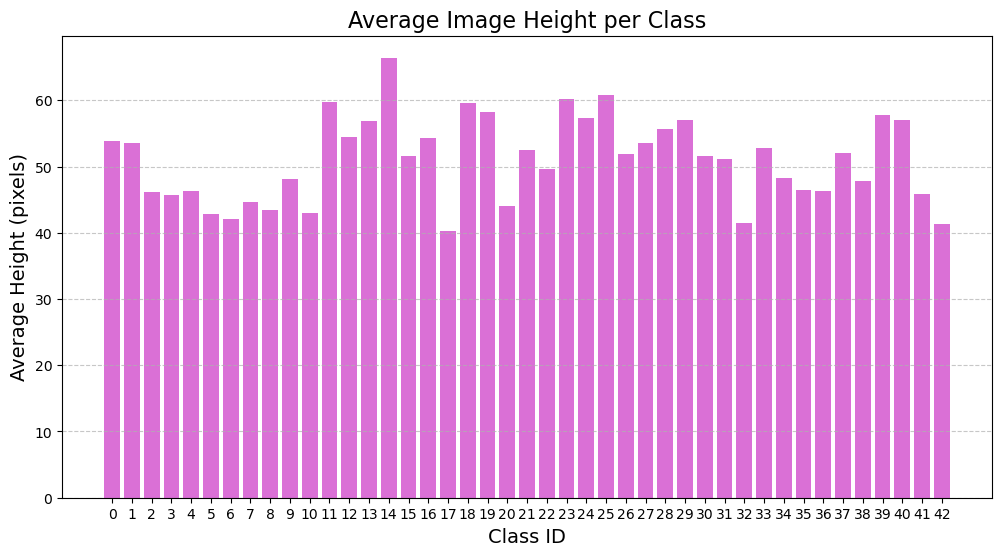

In [51]:
resolution_data = pd.DataFrame({
    'ClassId': class_ids,
    'Width': widths,
    'Height': heights
})
avg_dimensions = resolution_data.groupby('ClassId').mean()

plt.figure(figsize=(12, 6))
plt.bar(avg_dimensions.index, avg_dimensions['Width'], color='coral')
plt.title('Average Image Width per Class', fontsize=16)
plt.xlabel('Class ID', fontsize=14)
plt.ylabel('Average Width (pixels)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(avg_dimensions.index)
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(avg_dimensions.index, avg_dimensions['Height'], color='orchid')
plt.title('Average Image Height per Class', fontsize=16)
plt.xlabel('Class ID', fontsize=14)
plt.ylabel('Average Height (pixels)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(avg_dimensions.index)
plt.show()

In [52]:
brightness = []

for idx in range(num_samples):
    img_path = os.path.join(root, data.iloc[idx]['Path'])
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load in grayscale
    avg_brightness = img.mean()
    brightness.append(avg_brightness)

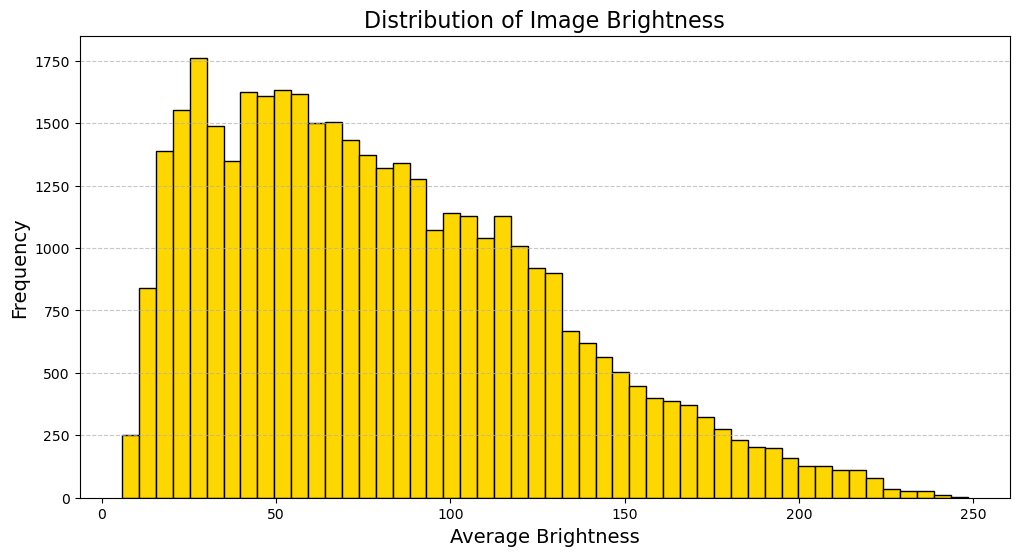

In [53]:
resolution_data['Brightness'] = brightness
plt.figure(figsize=(12, 6))
plt.hist(brightness, bins=50, color='gold', edgecolor='black')
plt.title('Distribution of Image Brightness', fontsize=16)
plt.xlabel('Average Brightness', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

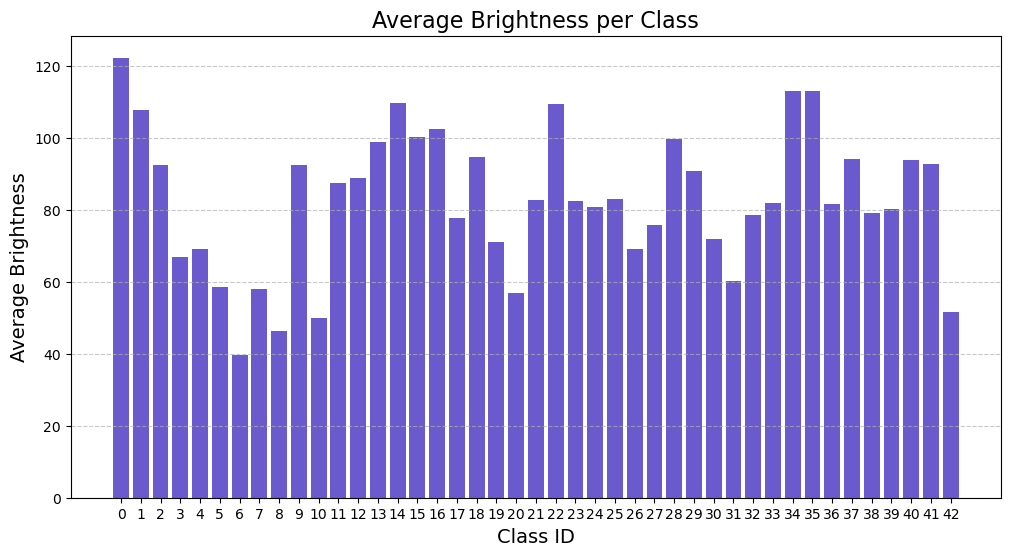

In [54]:
avg_brightness_per_class = resolution_data.groupby('ClassId')['Brightness'].mean()
plt.figure(figsize=(12, 6))
plt.bar(avg_brightness_per_class.index, avg_brightness_per_class.values, color='slateblue')
plt.title('Average Brightness per Class', fontsize=16)
plt.xlabel('Class ID', fontsize=14)
plt.ylabel('Average Brightness', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(avg_brightness_per_class.index)
plt.show()

The histograms show us that we have a wide range of resolutions unlike MNIST or CIFAR10. We have a peak around certain widths and heights which shows us that many pictures share similar dimensions. The level of brightness is also different across the images. There are classes that are significantly brighter that others.